## Exploratory of Dabrafenib 24hr expt3 files, preprocessing and clustering

Barcodes, classification, genes and matrix exploring based on <a href="https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html#Preprocessing-and-clustering-3k-PBMCs" target="_blank">Scanpy Preprocessing and clustering tutorial</a>.

Download <a href="https://ndownloader.figshare.com/files/18716363?private_link=139f64b495dea9d88c70" target="_blank">MIX-seq data</a>.

In [1]:
import pandas as pd
import scanpy as sc

In [2]:
barcodes = pd.read_csv('../data/Dabrafenib_24hr_expt3/barcodes.tsv', sep='\t', index_col=None, header=None)

In [3]:
barcodes

,0
0,AAACCTGAGAACAATC-1
1,AAACCTGAGAGTGACC-1
2,AAACCTGAGCAATATG-1
3,AAACCTGAGGCTACGA-1
4,AAACCTGAGTAAGTAC-1
...,...
12809,TTTGTCATCGGCGGTT-1
12810,TTTGTCATCGTTTGCC-1
12811,TTTGTCATCTAACTCT-1
12812,TTTGTCATCTCCGGTT-1


In [4]:
classification = pd.read_csv('../data/Dabrafenib_24hr_expt3/classifications.csv', sep=',', index_col=0, header=0)

In [5]:
classification

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGAGAACAATC-1,MDAMB435S_SKIN,654,0.665050,20.840922,0.492558,17.504745,1.064818,1268,0.004110,MDAMB435S_SKIN,SNU61_LARGE_INTESTINE,4.254491,0.097448,normal,3.581357e-12,ACH-000884
AAACCTGAGAGTGACC-1,EFM192A_BREAST,976,0.766314,16.766835,0.559345,14.183099,0.346450,2295,0.003843,EFM192A_BREAST,SNU245_BILIARY_TRACT,2.799506,0.143890,normal,3.093805e-13,ACH-000117
AAACCTGAGCAATATG-1,NUGC3_STOMACH,976,0.748349,11.308432,0.491814,9.096496,0.159204,1898,0.006281,NUGC3_STOMACH,MALME3M_SKIN,4.529510,0.144380,normal,9.366579e-11,ACH-000911
AAACCTGAGGCTACGA-1,A375_SKIN,884,0.652236,12.642941,0.437053,10.343784,0.103203,1936,0.009310,A375_SKIN,SW900_LUNG,4.536967,0.131391,normal,4.102901e-08,ACH-000219
AAACCTGAGTAAGTAC-1,MSTO211H_PLEURA,1090,0.640450,13.298456,0.422572,11.186694,0.329638,2257,0.008069,MSTO211H_PLEURA,IGROV1_OVARY,3.021535,0.147290,normal,1.120184e-08,ACH-000335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGGCGGTT-1,NCIH23_LUNG,717,0.723553,27.951918,0.596371,25.088783,0.185212,1388,0.018170,NCIH23_LUNG,COLO680N_OESOPHAGUS,8.377033,0.120914,normal,1.350583e-05,ACH-000900
TTTGTCATCGTTTGCC-1,NCIH322_LUNG,1093,0.618984,18.266524,0.463033,16.203012,0.142233,1971,0.011012,NCIH322_LUNG,JHH5_LIVER,4.672156,0.155715,normal,5.669849e-07,ACH-000837
TTTGTCATCTAACTCT-1,NCIH2444_LUNG,1375,0.734485,18.710337,0.533441,16.507542,0.253216,2701,0.004987,NCIH2444_LUNG,HS766T_PANCREAS,6.265973,0.181846,normal,8.562681e-12,ACH-000186


In [6]:
genes = pd.read_csv('../data/Dabrafenib_24hr_expt3/genes.tsv', sep='\t', header=None, index_col=0)

In [7]:
genes

,1
0,
ENSG00000243485,MIR1302-10
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000238009,RP11-34P13.7
ENSG00000239945,RP11-34P13.8
...,...
ENSG00000215635,AC145205.1
ENSG00000268590,BAGE5
ENSG00000251180,CU459201.1


In [8]:
mtx = pd.read_csv('../data/Dabrafenib_24hr_expt3/matrix.mtx', sep=' ', header=1, index_col=None)

In [9]:
mtx

,32738,12814,58223836
0,36,1,4
1,43,1,1
2,54,1,2
3,58,1,1
4,68,1,1
...,...,...,...
58223831,32705,12814,2
58223832,32706,12814,261
58223833,32707,12814,17
58223834,32708,12814,1


In [10]:
adata = sc.read_10x_mtx('../data/Dabrafenib_24hr_expt3/')

In [11]:
adata

AnnData object with n_obs × n_vars = 12814 × 32738
    var: 'gene_ids'

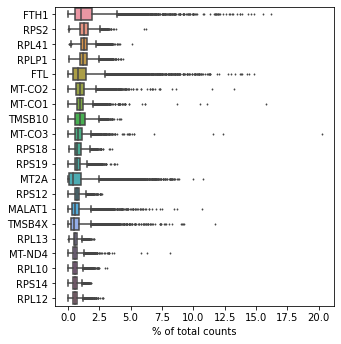

In [12]:
sc.pl.highest_expr_genes(adata, n_top=20,)

## Creating dataframe

In [13]:
adata.strings_to_categoricals()

In [14]:
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACCTGAGAACAATC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGTGACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGCAATATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGCTACGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGTAAGTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGGCGGTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCGTTTGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTAACTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTCCGGTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Basic filtering, marking mitochondrial genes

Filtering out cells that contain less than 200 detected genes. Filtering out genes that have been detected in less than 3 cells.

In [15]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Annotating the group of mitochondrial genes as 'mt', then filtering out mitochondrial genes.

In [15]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


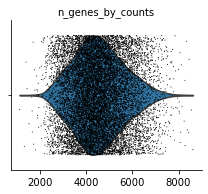

In [16]:
sc.pl.violin(adata, ['n_genes_by_counts', ],
             jitter=0.4, multi_panel=True)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


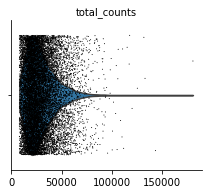

In [17]:
sc.pl.violin(adata, [ 'total_counts', ],
             jitter=0.4, multi_panel=True)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


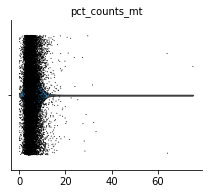

In [18]:
sc.pl.violin(adata, ['pct_counts_mt'],
             jitter=0.4, multi_panel=True)

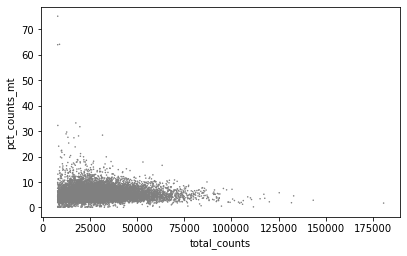

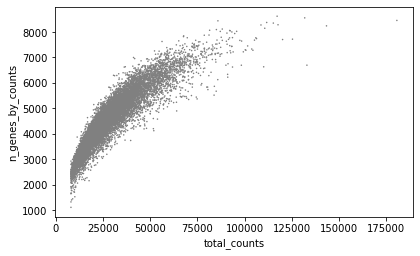

In [19]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

Removing cells that contain too many total counts or mithocondrial genes expressed based on the graphs above.

In [20]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :] 
adata = adata[adata.obs.pct_counts_mt < 20, :]

Normalizing and logarithmizing.

In [21]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [22]:
sc.pp.log1p(adata)

Identifying and filtering highly-variable genes.

In [23]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

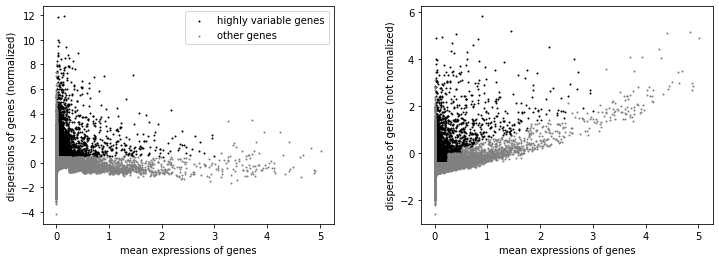

In [24]:
sc.pl.highly_variable_genes(adata)

In [25]:
adata.raw = adata

In [26]:
adata = adata[:, adata.var.highly_variable]  

Regressing out the influence of total counts per cell and the percentage of expressed mitochondrial genes. Scaling and cutting out data greater than standard deviation 10.

In [27]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) 

In [28]:
sc.pp.scale(adata, max_value=10)

## PCA

Running principal component analysis (PCA) to display the main axes of variation and reduce noise in data.

In [29]:
sc.tl.pca(adata, svd_solver='arpack') 

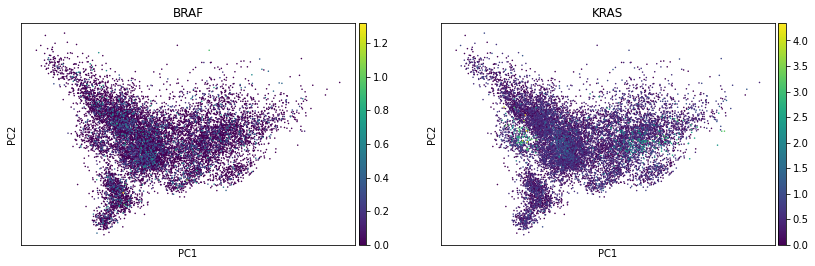

In [30]:
sc.pl.pca(adata, color=[ 'BRAF', 'KRAS'])

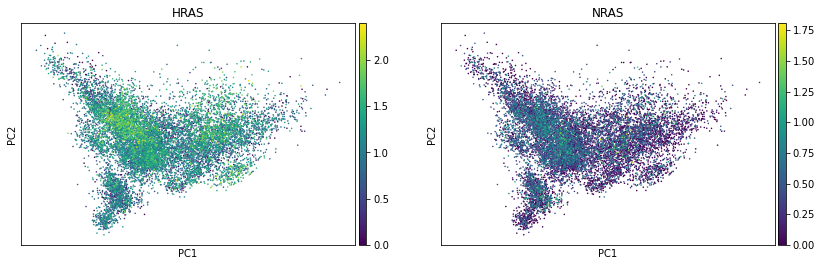

In [31]:
sc.pl.pca(adata, color=[ 'HRAS', 'NRAS'])

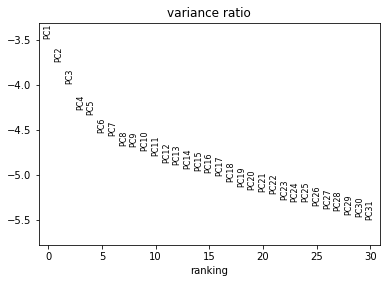

In [34]:
sc.pl.pca_variance_ratio(adata, log=True) 

In [38]:
print(sorted(list(adata.var_names)))

['7SK-2', 'A2M', 'AARD', 'ABCA1', 'ABCA7', 'ABCB5', 'ABCC2', 'ABCC3', 'ABHD12B', 'ABHD2', 'ABLIM1', 'AC002454.1', 'AC002456.2', 'AC003092.1', 'AC004540.4', 'AC006262.4', 'AC006262.5', 'AC006277.2', 'AC009005.2', 'AC009336.24', 'AC009410.1', 'AC009502.4', 'AC018799.1', 'AC020571.3', 'AC023490.1', 'AC064834.1', 'AC073218.2', 'AC073236.3', 'AC074389.9', 'AC093901.1', 'AC098973.2', 'AC104135.3', 'AC104654.2', 'AC108142.1', 'AC145212.1', 'ACOX2', 'ACP5', 'ACP6', 'ACSL5', 'ACTA2', 'ACTC1', 'ACTG2', 'ACTL10', 'ADAM17', 'ADAM19', 'ADAM8', 'ADAMTS1', 'ADAMTS12', 'ADAMTS5', 'ADAMTS6', 'ADAMTS9', 'ADD3', 'ADIRF', 'ADM', 'ADRB2', 'ADRM1', 'ADTRP', 'AEBP1', 'AF127936.7', 'AFAP1-AS1', 'AFMID', 'AFP', 'AGAP2-AS1', 'AGPAT9', 'AGR2', 'AGR3', 'AGT', 'AHNAK2', 'AHSG', 'AIF1L', 'AIFM2', 'AIM2', 'AK5', 'AKAP12', 'AKAP8L', 'AKIRIN1', 'AKR1B1', 'AKR1B10', 'AKR1C1', 'AKR1C2', 'AKR1C3', 'AKR7A3', 'ALB', 'ALCAM', 'ALDH1A1', 'ALDH1A2', 'ALDH1A3', 'ALDH2', 'ALDH3A1', 'ALDH3A2', 'ALDH3B2', 'ALDH7A1', 'ALPP', 'ALX1

Computing neighborhood graph, embedding the graph in two dimensions using <a href="https://arxiv.org/abs/1802.03426" target="_blank">UMAP</a>.

In [39]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [40]:
sc.tl.umap(adata)

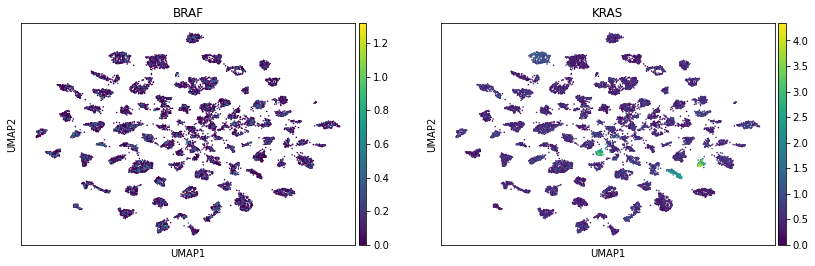

In [41]:
sc.pl.umap(adata, color=['BRAF', 'KRAS' ])

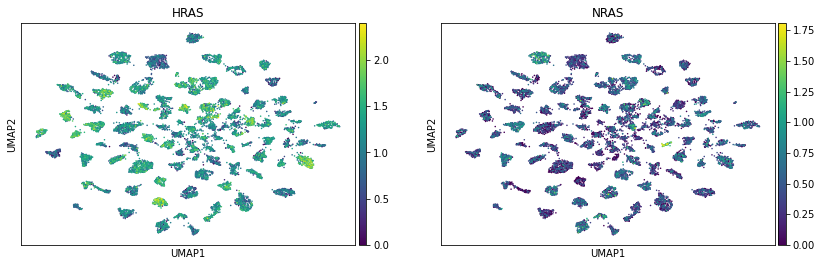

In [42]:
sc.pl.umap(adata, color=['HRAS', 'NRAS'])  

## Clustering the neighborhood graph

In [48]:
sc.tl.leiden(adata)

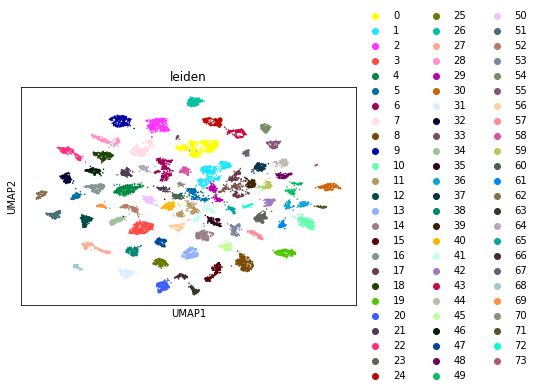

In [49]:
sc.pl.umap(adata, color=['leiden' ])

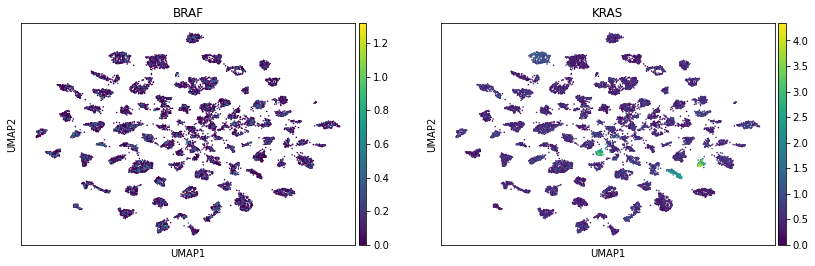

In [50]:
sc.pl.umap(adata, color=[ 'BRAF', 'KRAS'])

## Cell line annotation

Using **classification.csv** as metadata.

In [51]:
celllines = classification.singlet_ID.tolist()
test_celllist = list(set(celllines))
test_celllist.sort()
print(test_celllist)

['22RV1_PROSTATE', '42MGBA_CENTRAL_NERVOUS_SYSTEM', '769P_KIDNEY', '786O_KIDNEY', '8505C_THYROID', 'A2780_OVARY', 'A375_SKIN', 'ACCMESO1_PLEURA', 'AGS_STOMACH', 'BEN_LUNG', 'CAL120_BREAST', 'CAL62_THYROID', 'CAOV3_OVARY', 'CJM_SKIN', 'COLO668_LUNG', 'COLO680N_OESOPHAGUS', 'COV434_OVARY', 'DMS273_LUNG', 'DV90_LUNG', 'EFM192A_BREAST', 'G401_SOFT_TISSUE', 'GCIY_STOMACH', 'GP2D_LARGE_INTESTINE', 'HCC1143_BREAST', 'HCC1195_LUNG', 'HCC1419_BREAST', 'HEC1B_ENDOMETRIUM', 'HEP3B217_LIVER', 'HS766T_PANCREAS', 'HS852T_SKIN', 'HUCCT1_BILIARY_TRACT', 'IGR1_SKIN', 'IGROV1_OVARY', 'ISTMES1_PLEURA', 'J82_URINARY_TRACT', 'JHH5_LIVER', 'JHOM1_OVARY', 'KNS42_CENTRAL_NERVOUS_SYSTEM', 'KNS60_CENTRAL_NERVOUS_SYSTEM', 'KNS81_CENTRAL_NERVOUS_SYSTEM', 'KYSE270_OESOPHAGUS', 'LI7_LIVER', 'LK2_LUNG', 'LMSU_STOMACH', 'LN229_CENTRAL_NERVOUS_SYSTEM', 'LNCAPCLONEFGC_PROSTATE', 'LOVO_LARGE_INTESTINE', 'LUDLU1_LUNG', 'MALME3M_SKIN', 'MDAMB435S_SKIN', 'MDAMB468_BREAST', 'MIAPACA2_PANCREAS', 'MSTO211H_PLEURA', 'NCIH1048_

In [52]:
meta = classification

In [53]:
meta.head()

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGAGAACAATC-1,MDAMB435S_SKIN,654,0.665050,20.840922,0.492558,17.504745,1.064818,1268,0.004110,MDAMB435S_SKIN,SNU61_LARGE_INTESTINE,4.254491,0.097448,normal,3.581357e-12,ACH-000884
AAACCTGAGAGTGACC-1,EFM192A_BREAST,976,0.766314,16.766835,0.559345,14.183099,0.346450,2295,0.003843,EFM192A_BREAST,SNU245_BILIARY_TRACT,2.799506,0.143890,normal,3.093805e-13,ACH-000117
AAACCTGAGCAATATG-1,NUGC3_STOMACH,976,0.748349,11.308432,0.491814,9.096496,0.159204,1898,0.006281,NUGC3_STOMACH,MALME3M_SKIN,4.529510,0.144380,normal,9.366579e-11,ACH-000911
AAACCTGAGGCTACGA-1,A375_SKIN,884,0.652236,12.642941,0.437053,10.343784,0.103203,1936,0.009310,A375_SKIN,SW900_LUNG,4.536967,0.131391,normal,4.102901e-08,ACH-000219
AAACCTGAGTAAGTAC-1,MSTO211H_PLEURA,1090,0.640450,13.298456,0.422572,11.186694,0.329638,2257,0.008069,MSTO211H_PLEURA,IGROV1_OVARY,3.021535,0.147290,normal,1.120184e-08,ACH-000335


In [54]:
adata.obs.head()

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACCTGAGAACAATC-1,3186,18004.0,765.0,4.249056,51
AAACCTGAGAGTGACC-1,4705,38890.0,1088.0,2.797634,27
AAACCTGAGCAATATG-1,4720,29375.0,1330.0,4.527660,32
AAACCTGAGGCTACGA-1,4293,35896.0,1628.0,4.535324,52
AAACCTGAGTAAGTAC-1,4814,35976.0,1086.0,3.018679,44


In [55]:
adata.obs['Cell type'] = meta.loc[adata.obs.index, 'singlet_ID']

In [56]:
f = lambda x: x.split('_', 1  ) [1]
adata.obs['Tissue type'] = adata.obs['Cell type'].apply( f )

... storing 'Cell type' as categorical
... storing 'Tissue type' as categorical


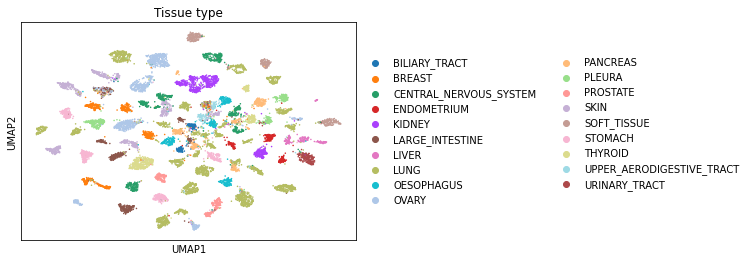

In [57]:
sc.pl.umap(adata, color='Tissue type')

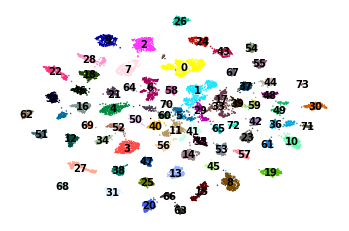

In [58]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [59]:
list(adata.obs['Cell type'].unique())

['MDAMB435S_SKIN',
 'EFM192A_BREAST',
 'NUGC3_STOMACH',
 'A375_SKIN',
 'MSTO211H_PLEURA',
 'COLO668_LUNG',
 'NCIH522_LUNG',
 'SW48_LARGE_INTESTINE',
 'NCIH1793_LUNG',
 '786O_KIDNEY',
 'HCC1143_BREAST',
 'NCIH838_LUNG',
 'SNU1214_UPPER_AERODIGESTIVE_TRACT',
 'LN229_CENTRAL_NERVOUS_SYSTEM',
 'DMS273_LUNG',
 'NCIH1299_LUNG',
 'CAL62_THYROID',
 'A2780_OVARY',
 'HS852T_SKIN',
 'TEN_ENDOMETRIUM',
 'NCIH1915_LUNG',
 'HS766T_PANCREAS',
 'TE11_OESOPHAGUS',
 '769P_KIDNEY',
 'NCIH1581_LUNG',
 'IGR1_SKIN',
 'SKUT1_SOFT_TISSUE',
 'TUHR4TKB_KIDNEY',
 'OAW42_OVARY',
 'NCIH1573_LUNG',
 'LI7_LIVER',
 'SW900_LUNG',
 'NCIH1650_LUNG',
 'HUCCT1_BILIARY_TRACT',
 'TE6_OESOPHAGUS',
 'NCIH1693_LUNG',
 '22RV1_PROSTATE',
 'LMSU_STOMACH',
 'ACCMESO1_PLEURA',
 '42MGBA_CENTRAL_NERVOUS_SYSTEM',
 'MDAMB468_BREAST',
 'SNU245_BILIARY_TRACT',
 'NCIH322_LUNG',
 'G401_SOFT_TISSUE',
 'SW480_LARGE_INTESTINE',
 'LK2_LUNG',
 'NCIH1048_LUNG',
 'SNU61_LARGE_INTESTINE',
 'NCIH2444_LUNG',
 'LOVO_LARGE_INTESTINE',
 'CAOV3_OVARY',
